In [22]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import random
from flax.training import train_state

import pandas as pd
import matplotlib.pyplot as plt

# RELOADING MODULES
import importlib
import neural_net_jax
importlib.reload(neural_net_jax)
NeuralODE = neural_net_jax.NeuralODE

## `monthly`

In [23]:
t_train = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/t_train_m.csv'), dtype=jnp.float32)) # x is timepoints t
t_test = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/t_test_m.csv'), dtype=jnp.float32))

Y_train = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/Y_train_m.csv'))) 
Y_test = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/Y_test_m.csv'))) # y is the mean temperature

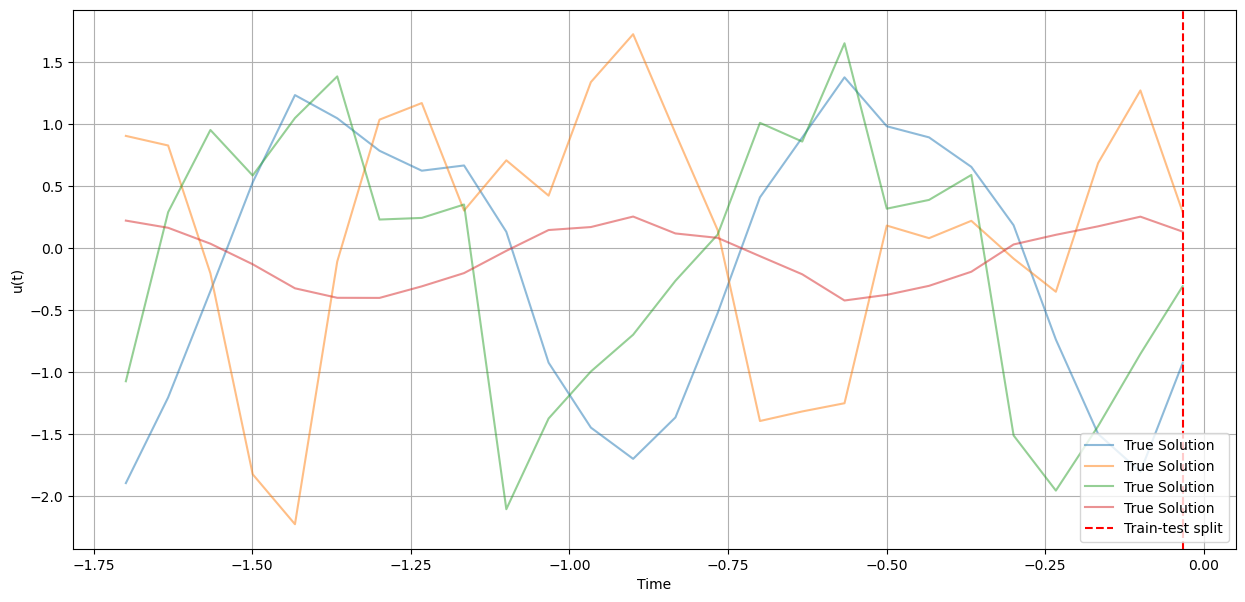

In [24]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(t_train, Y_train, label='True Solution', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.axvline(x=t_train[-1], color='r', linestyle='--', label='Train-test split')
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()

In [25]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.1)

In [26]:
print(len(t_train))
n = int(len(t_train)/10)

26


In [27]:
y_train = Y_train[:,0]
x_train = Y_train[:,1:]
print(y_train.shape)
print(x_train.shape)

y_test = Y_test[:,0]
x_test = Y_test[:,1:]
print(y_test.shape)
print(x_test.shape)

(26,)
(26, 3)
(26,)
(26, 3)


#### `gradually increasing the training size`

In [32]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.1)

k_list = [1, 2, 4, 6, 8]

for k in k_list:
    print(k)
    print(n*k/len(t_train))    
    state = model.train(state, t_train[:n*k], Y_train[:n*k], Y_train[0], loss = 0.1)

state = model.train(state, t_train, Y_train, Y_train[0], loss = 0.1)

1
0.07692307692307693
Epoch 100, Loss: 0.12728434801101685
2
0.15384615384615385
Epoch 100, Loss: 0.20247986912727356
Epoch 200, Loss: 0.1264193058013916
Epoch 300, Loss: 0.10775186121463776
Epoch 400, Loss: 0.1002858579158783
4
0.3076923076923077
Epoch 100, Loss: 0.27721309661865234
Epoch 200, Loss: 0.18653351068496704
Epoch 300, Loss: 0.15027625858783722
Epoch 400, Loss: 0.13088686764240265
Epoch 500, Loss: 0.11934643983840942
Epoch 600, Loss: 0.1121440902352333
Epoch 700, Loss: 0.10675131529569626
Epoch 800, Loss: 0.10147401690483093
6
0.46153846153846156
Epoch 100, Loss: 0.16755156219005585
Epoch 200, Loss: 0.15287932753562927
Epoch 300, Loss: 0.14447623491287231
Epoch 400, Loss: 0.1363902986049652
Epoch 500, Loss: 0.13021676242351532
Epoch 600, Loss: 0.125090092420578
Epoch 700, Loss: 0.12018080055713654
Epoch 800, Loss: 0.11482381820678711
Epoch 900, Loss: 0.11034898459911346
Epoch 1000, Loss: 0.10617613047361374
Epoch 1100, Loss: 0.10219177603721619
8
0.6153846153846154
Epoch 10

## `Training all at once`

In [33]:
"""rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 4]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.1)

state = model.train(state, t_train, Y_train, Y_train[0], loss = 0.1)"""

'rng = random.PRNGKey(0)\nlearning_rate = 0.001\n\nlayer_widths = [5, 64, 32, 32, 4]\n\nmodel = NeuralODE(layer_widths, time_invariant=False)\nstate = model.create_train_state(rng, learning_rate, regularizer=0.1)\n\nstate = model.train(state, t_train, Y_train, Y_train[0], loss = 0.1)'

In [34]:
# (self, params, y0, t, state, args = None):
y_train_pred = model.neural_ode(state.params, Y_train[0], t_train, state)
y_test_pred = model.neural_ode(state.params, Y_train[0], t_test, state)

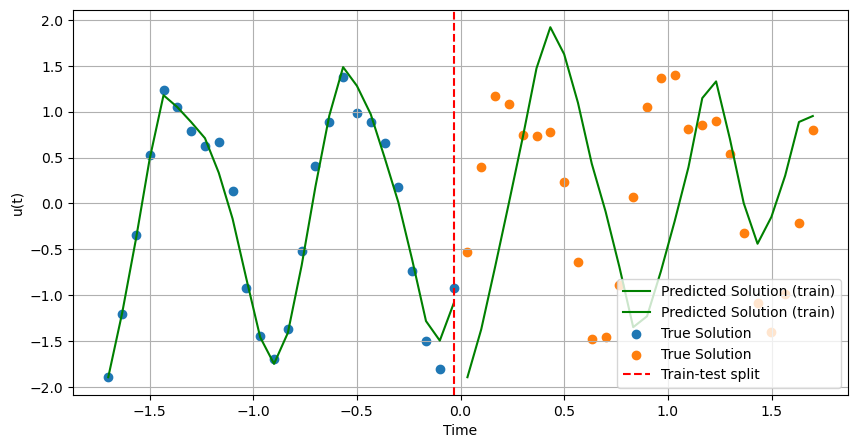

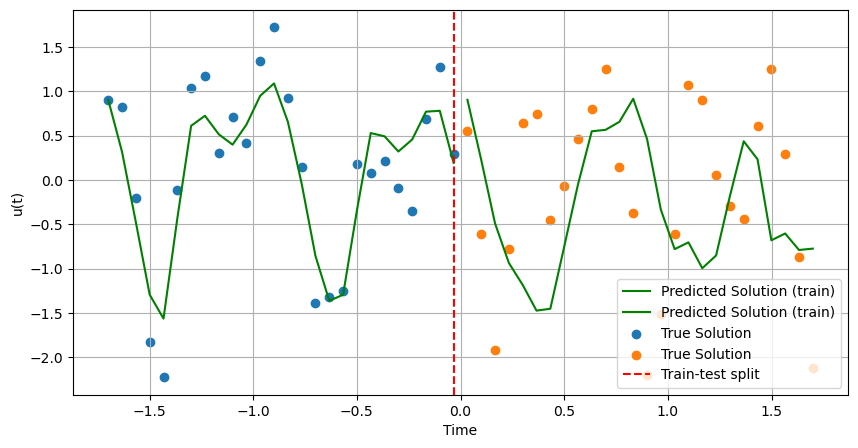

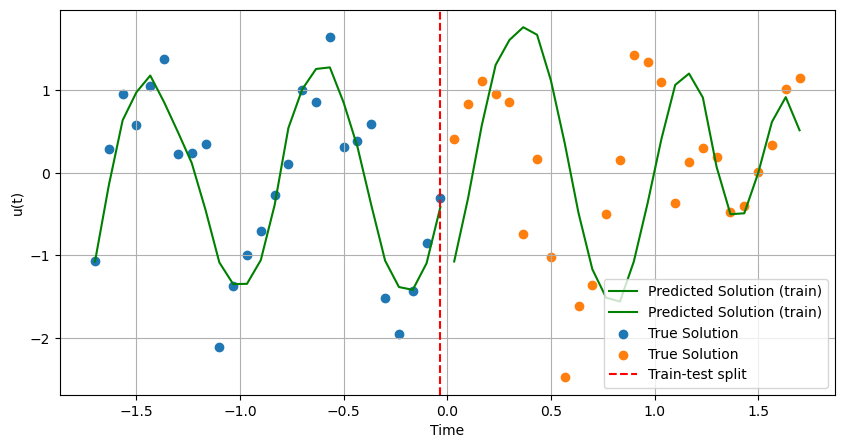

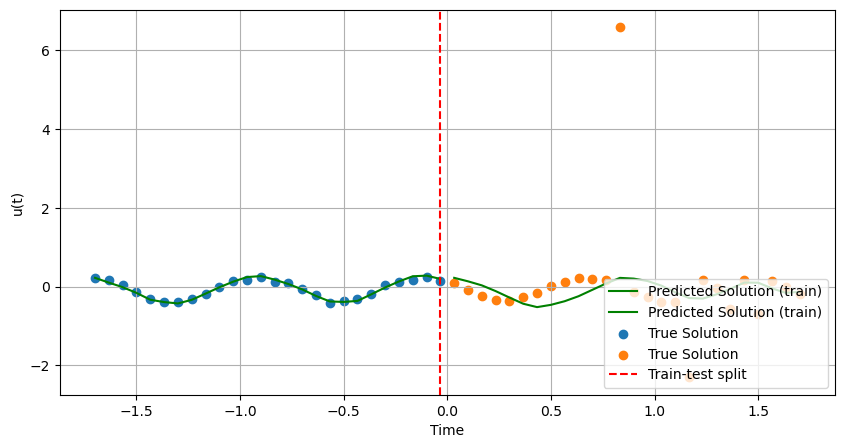

In [35]:
for i in range(4):
    #---------------------------PLOTTING RESULTS--------------------------#
    plt.figure(figsize=(10, 5))
    plt.plot(t_train, y_train_pred[:,i], 'g', label='Predicted Solution (train)')
    plt.plot(t_test, y_test_pred[:,i], 'g', label='Predicted Solution (train)')
    #plt.plot(t_test, y_test_pred, 'r', label='Predicted Solution (test)')
    plt.scatter(t_train, Y_train[:,i], label='True Solution', alpha = 1)
    plt.scatter(t_test, Y_test[:,i], label='True Solution', alpha = 1)

    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.axvline(x=t_train[-1], color='r', linestyle='--', label='Train-test split')
    plt.legend(loc ="lower right")
    plt.grid(True)
    plt.show()

## `weekly`

In [36]:
t_train_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/t_train_w.csv'), dtype=jnp.float32)) # x is timepoints t
t_test_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/t_test_w.csv'), dtype=jnp.float32))

Y_train_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/Y_train_w.csv'))) 
Y_test_w = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/Y_test_w.csv'))) # y is the mean temperature

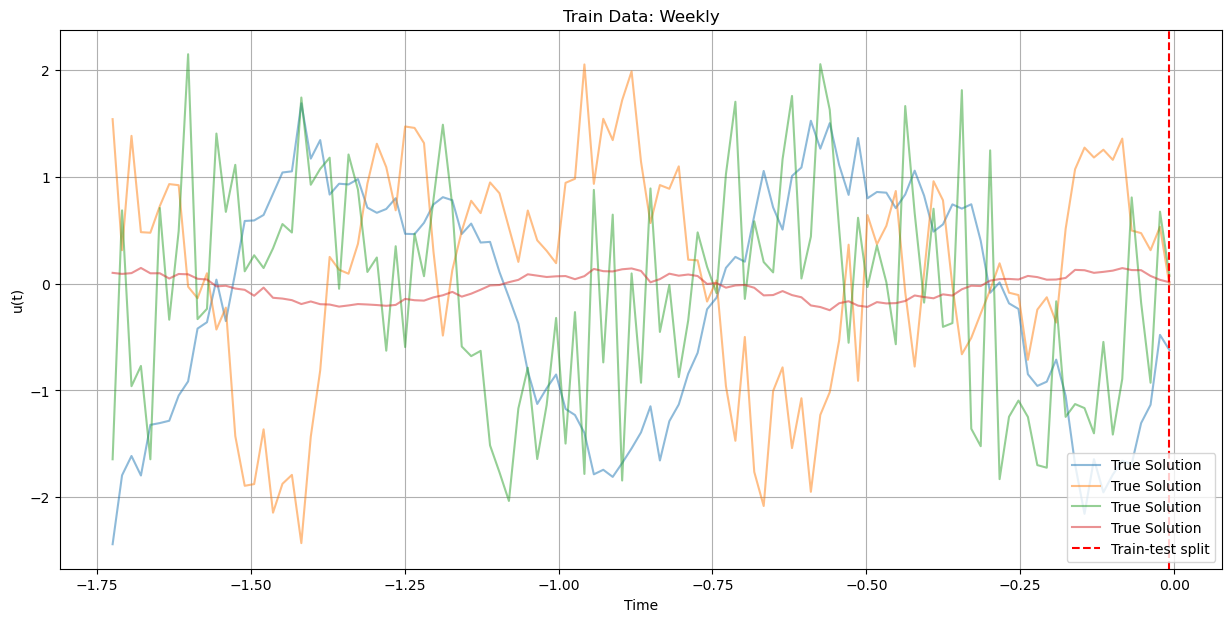

In [37]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(t_train_w, Y_train_w, label='True Solution', alpha = 0.5)
#plt.plot(t_test_w, Y_test_w, label='True Solution', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.axvline(x=t_train_w[-1], color='r', linestyle='--', label='Train-test split')
plt.title("Train Data: Weekly")
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()

In [ ]:
n = 200

y_train = np.atleast_2d(Y_train[:,0]).T
x_train = Y_train[:,1:]

y_test = np.atleast_2d(Y_test[:,0]).T
y_test = Y_test[:,1:]

In [39]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 1]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate, regularizer=0.01)

k_list = [1, 2, 4, 6, 8]

for k in k_list:
    print(k)
    print(n*k/len(t_train_w))    
    state = model.train(state, t_train_w[:n*k], Y_train_w[:n*k], Y_train_w[0], loss = 0.2, extra_args=x_train[:n*k])
    
state = model.train(state, t_train_w, Y_train_w, Y_train_w[0], loss = 0.2)

1
0.017699115044247787
Epoch 100, Loss: 0.8317369818687439
Epoch 200, Loss: 0.7763398885726929
Epoch 300, Loss: 0.7278582453727722
Epoch 400, Loss: 0.6833325028419495
Epoch 500, Loss: 0.6419154405593872
Epoch 600, Loss: 0.6031830310821533
Epoch 700, Loss: 0.5668578147888184
Epoch 800, Loss: 0.5327329039573669
Epoch 900, Loss: 0.500641405582428
Epoch 1000, Loss: 0.4704239070415497
Epoch 1100, Loss: 0.44196322560310364
Epoch 1200, Loss: 0.4151306450366974
Epoch 1300, Loss: 0.3898199200630188
Epoch 1400, Loss: 0.3659374415874481
Epoch 1500, Loss: 0.3433849513530731
Epoch 1600, Loss: 0.32208460569381714
Epoch 1700, Loss: 0.3019630014896393
Epoch 1800, Loss: 0.2829401195049286
Epoch 1900, Loss: 0.264969140291214
Epoch 2000, Loss: 0.24797900021076202
Epoch 2100, Loss: 0.23192031681537628
Epoch 2200, Loss: 0.21675477921962738
Epoch 2300, Loss: 0.20242400467395782
2
0.035398230088495575
4
0.07079646017699115
Epoch 100, Loss: 0.2038668394088745
6
0.10619469026548672
Epoch 100, Loss: 0.258877605

In [20]:
# (self, params, y0, t, state, args = None):
Y_train_pred_w = model.neural_ode(state.params, Y_train_w[0], t_train_w, state)
Y_test_pred_w = model.neural_ode(state.params, Y_train_w[-1], t_test_w, state)

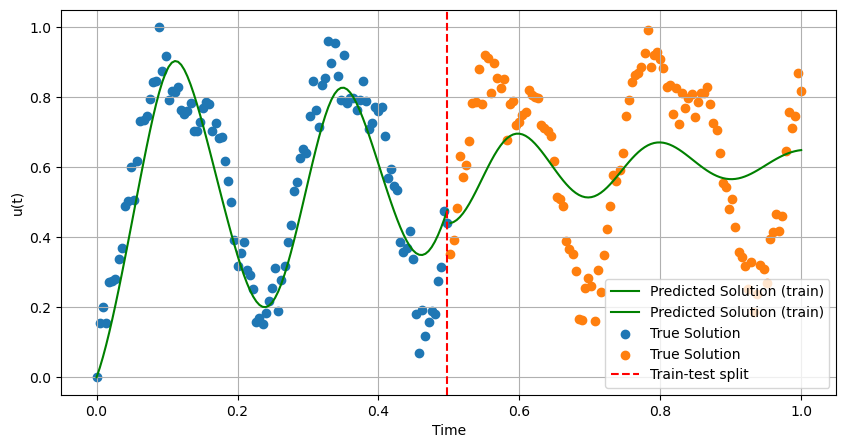

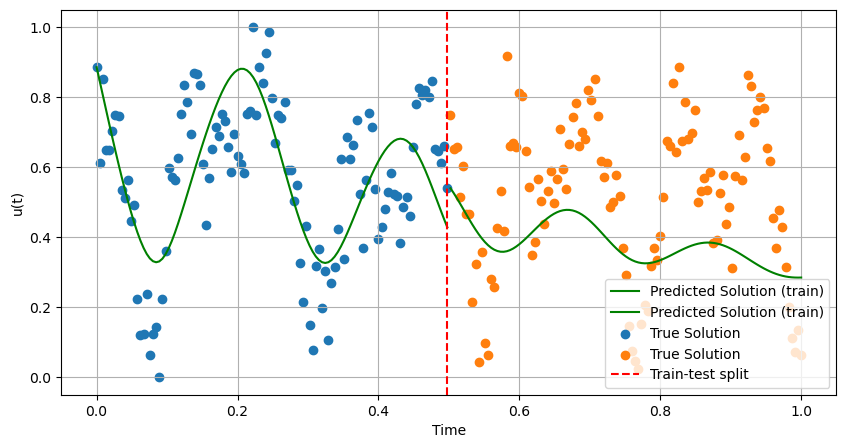

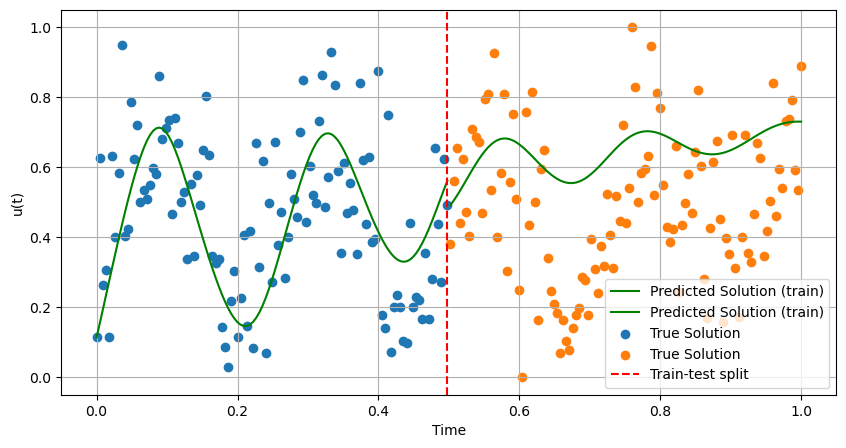

In [21]:
for i in range(3):
    #---------------------------PLOTTING RESULTS--------------------------#
    plt.figure(figsize=(10, 5))
    plt.plot(t_train_w, Y_train_pred_w[:,i], 'g', label='Predicted Solution (train)')
    plt.plot(t_test_w, Y_test_pred_w[:,i], 'g', label='Predicted Solution (train)')
    plt.scatter(t_train_w, Y_train_w[:,i], label='True Solution', alpha = 1)
    plt.scatter(t_test_w, Y_test_w[:,i], label='True Solution', alpha = 1)

    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.axvline(x=t_train_w[-1], color='r', linestyle='--', label='Train-test split')
    plt.legend(loc ="lower right")
    plt.grid(True)
    plt.show()